# Модуль 11. **Рекурентні нейронні мережі** 

### Завдання

В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.



На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.



Порівняйте результати та зробіть висновки.

In [ ]:
! pip install keras --upgrade tensorflow --upgrade

In [25]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, GRU, SimpleRNN, Dense
import pandas as pd

     Параметри 

In [26]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті

models, titles = [], []
epochs = 10
batch_size = 8
optimizer = "adamw"
activation = "sigmoid"
verbose = 1
summary = False

     Завантаження даних 

In [27]:
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [28]:
print(f"{input_train.shape = }")
print(f"    {y_train.shape = }")
print(f" {input_test.shape = }")
print(f"     {y_test.shape = }")

input_train.shape = (25000, 500)
    y_train.shape = (25000,)
 input_test.shape = (25000, 500)
     y_test.shape = (25000,)


     Функція відображення графіків історії точності та втрат 
######      Аргументи: <br>1. history - дані історії точності та втрат<br>2. title - заголовок графіка

In [29]:
def plt_history(
    history, title="Точність та втрати на тренувальному та тестовому наборах"
):
    plt.figure(figsize=(10, 6))

    dict_data = {
        "acc": "Точність на тренувальному наборі",
        "val_acc": "Точність на тестовому наборі",
        "loss": "Втрати на тренувальному наборі",
        "val_loss": "Втрати на тестовому наборі",
    }

    epochs = range(1, len(history.history["acc"]) + 1)

    color_acc = "royalblue"
    color_loss = "peru"
    linestyle_train = "--"
    linestyle_test = "-"

    for data_, label_ in dict_data.items():
        plt.plot(
            epochs,
            history.history[data_],
            color=color_loss if (data_[-4:] == "loss") else color_acc,
            linestyle=linestyle_test if (data_[:3] == "val") else linestyle_train,
            label=label_,
        )

    plt.ylim(0, 1)
    plt.title(title)
    plt.xlabel("Епоха")
    plt.ylabel("Метрика")
    plt.legend()
    plt.show()

     Створення моделей 

# Simple Recurrent Neural Network (RNN)

In [30]:
title_rnn = "Simple Recurrent Neural Network (RNN)"

model_rnn = Sequential()
# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_rnn.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation=activation))

titles.append(title_rnn)
models.append(model_rnn)

# Long Short-Term Memory (LSTM)

In [31]:
title_lstm = "Long Short-Term Memory (LSTM)"

model_lstm = Sequential()
# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_lstm.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation=activation))

titles.append(title_lstm)
models.append(model_lstm)

# Gated Recurrent Unit (GRU)

In [32]:
title_gru = "Gated Recurrent Unit (GRU)"

model_gru = Sequential()
# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_gru.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model_gru.add(GRU(32))
model_gru.add(Dense(1, activation=activation))

titles.append(title_gru)
models.append(model_gru)

# Bidirectional Recurrent Neural Network (BRNN)

In [33]:
title_brnn = "Bidirectional Recurrent Neural Network + LSTM (BRNN)"

model_brnn = Sequential()
# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_brnn.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model_brnn.add(Bidirectional(LSTM(32)))
model_brnn.add(Dense(1, activation=activation))

titles.append(title_brnn)
models.append(model_brnn)

In [34]:
title_brnn_s = "Bidirectional Recurrent Neural Network + SimpleRNN (BRNN_2)"

model_brnn_s = Sequential()
# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_brnn_s.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model_brnn_s.add(Bidirectional(SimpleRNN(32)))
model_brnn_s.add(Dense(1, activation=activation))

titles.append(title_brnn_s)
models.append(model_brnn_s)

# Deep Recurrent Neural Network (DRNN)

In [35]:
title_drnn = "Deep Recurrent Neural Network + LSTM (DRNN)"

model_drnn = Sequential()
# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_drnn.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model_drnn.add(Bidirectional(LSTM(32, return_sequences=True)))
model_drnn.add(Bidirectional(LSTM(32)))
model_drnn.add(Dense(1, activation=activation))

titles.append(title_drnn)
models.append(model_drnn)

In [36]:
title_drnn_s = "Deep Recurrent Neural Network + SimpleRNN (DRNN_2)"

model_drnn_s = Sequential()
# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_drnn_s.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model_drnn_s.add(SimpleRNN(32, return_sequences=True))
model_drnn_s.add(SimpleRNN(32))
model_drnn_s.add(Dense(1, activation=activation))

titles.append(title_drnn_s)
models.append(model_drnn_s)

     Компіляція та навчання моделей 

In [38]:
histories = []

for i, model in enumerate(models):
    print(f"Training model {i+1} - \033[33m{titles[i]}\033[0m...")

    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["acc"])

    if summary:
        model.summary()

    history = model.fit(
        input_train,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(input_test, y_test),
        verbose=verbose,
    )
    histories.append(history)

Training model 1 - Simple Recurrent Neural Network (RNN)...
Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 238s 76ms/step - acc: 0.6533 - loss: 0.6062 - val_acc: 0.7412 - val_loss: 0.5214
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 241s 77ms/step - acc: 0.7279 - loss: 0.5469 - val_acc: 0.7744 - val_loss: 0.4781
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 235s 75ms/step - acc: 0.8299 - loss: 0.3945 - val_acc: 0.7951 - val_loss: 0.4687
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 232s 74ms/step - acc: 0.8127 - loss: 0.4195 - val_acc: 0.7771 - val_loss: 0.4868
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 26879s 9s/step - acc: 0.8279 - loss: 0.3810 - val_acc: 0.6989 - val_loss: 0.5754
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 223s 71ms/step - acc: 0.8572 - loss: 0.3404 - val_acc: 0.8107 - val_loss: 0.4582
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 252s 81ms/step - acc: 0.8973 - loss: 0.2595 - val_acc: 0.6669 - val_loss: 0.6286
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 210s 67ms/step - acc: 0.8023 - loss: 

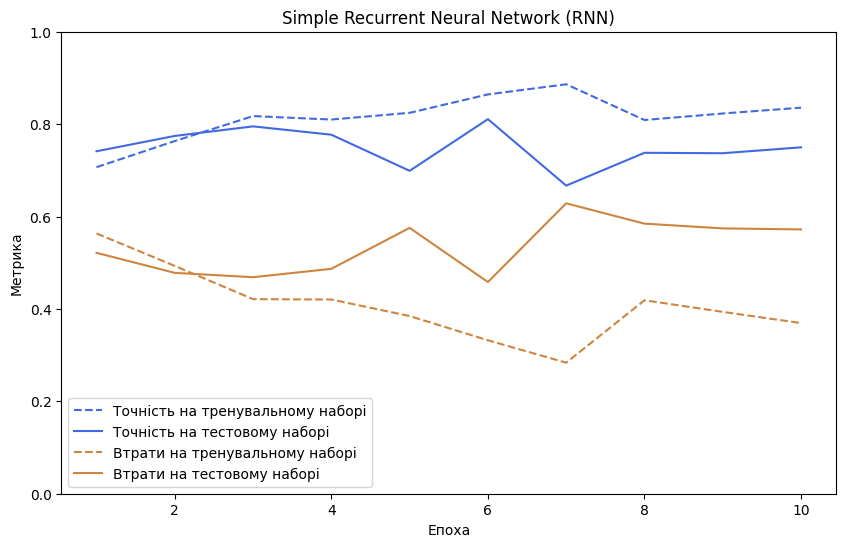

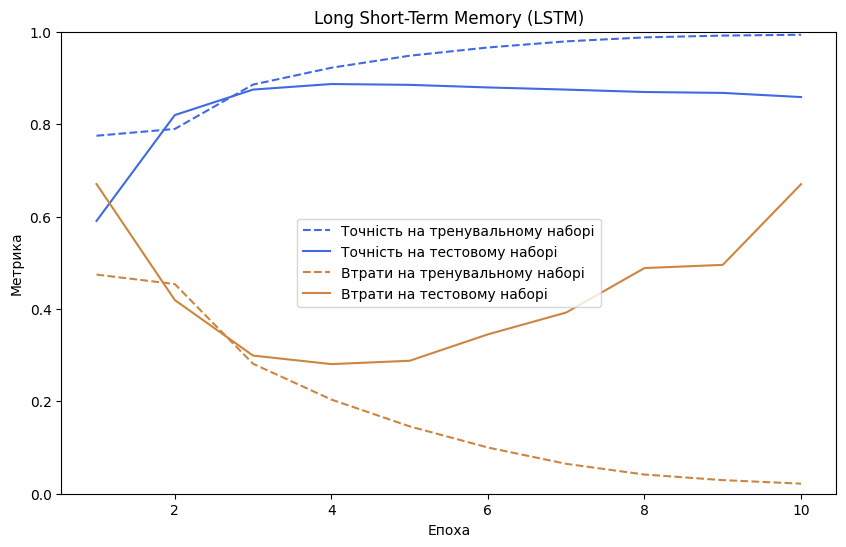

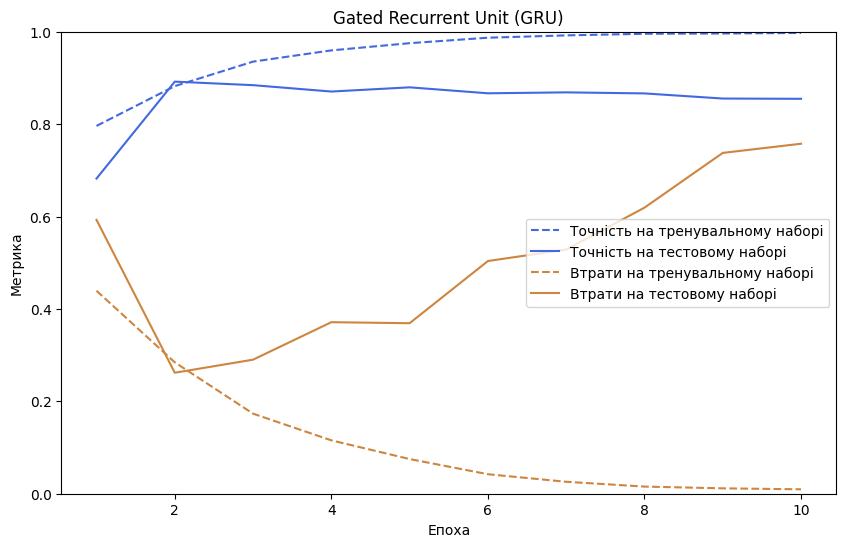

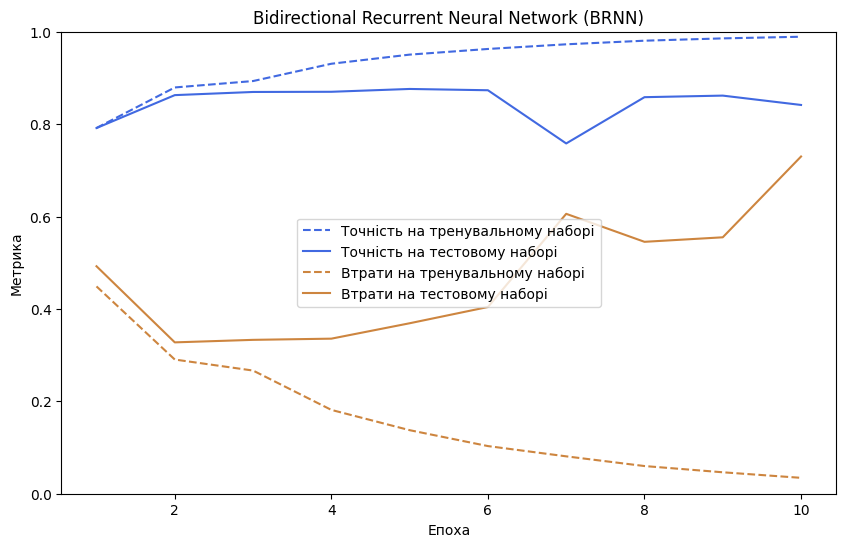

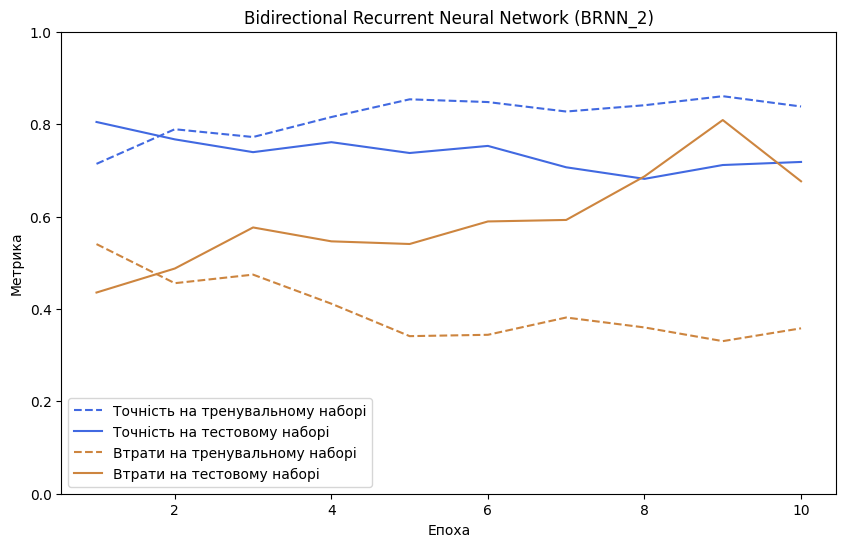

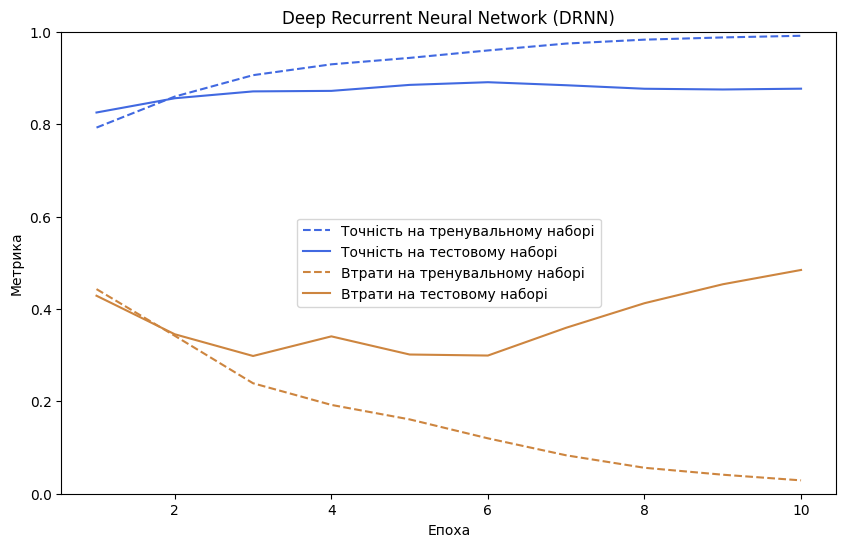

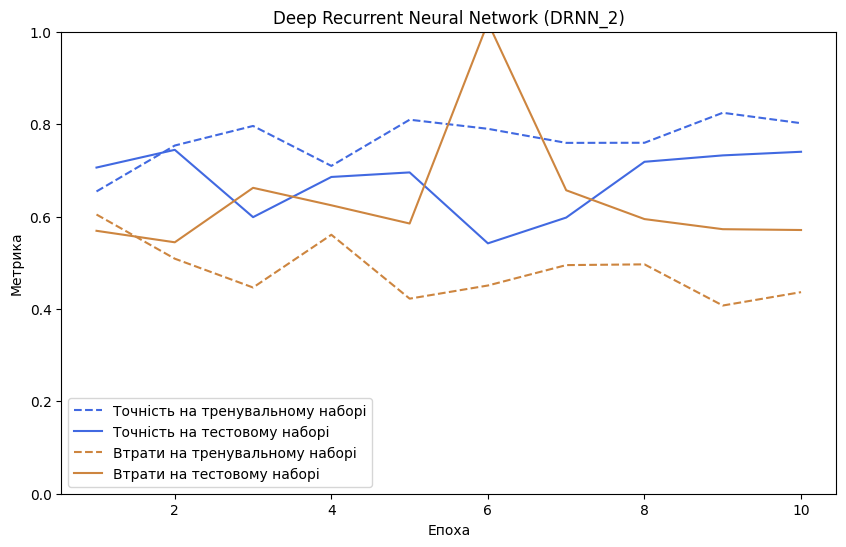

In [39]:
for i, history in enumerate(histories):
    plt_history(history, title=titles[i])

In [40]:
# Creating a list for options
train_acc, train_loss, val_acc, val_loss = [], [], [], []

# Collecting results from stories
for history in histories:
    train_acc.append(history.history["acc"][-1])
    train_loss.append(history.history["loss"][-1])
    val_acc.append(history.history["val_acc"][-1])
    val_loss.append(history.history["val_loss"][-1])

# Creating a DataFrame
df = pd.DataFrame(
    {
        "Model": titles,
        "Train Accuracy": train_acc,
        "Train Loss": train_loss,
        "Validation Accuracy": val_acc,
        "Validation Loss": val_loss,
    }
)

df.head(len(models))

,Model,Train Accuracy,Train Loss,Validation Accuracy,Validation Loss
0,Simple Recurrent Neural Network (RNN),0.83564,0.369339,0.74976,0.572069
1,Long Short-Term Memory (LSTM),0.99348,0.021806,0.85856,0.669952
2,Gated Recurrent Unit (GRU),0.99736,0.009566,0.85480,0.757556
3,Bidirectional Recurrent Neural Network (BRNN),0.98916,0.034380,0.84148,0.729907
4,Bidirectional Recurrent Neural Network (BRNN_2),0.83816,0.358014,0.71812,0.676253


In [45]:
df.head(len(models))

,Model,Train Accuracy,Train Loss,Validation Accuracy,Validation Loss
0,Simple Recurrent Neural Network (RNN),0.83564,0.369339,0.74976,0.572069
1,Long Short-Term Memory (LSTM),0.99348,0.021806,0.85856,0.669952
2,Gated Recurrent Unit (GRU),0.99736,0.009566,0.85480,0.757556
3,Bidirectional Recurrent Neural Network (BRNN),0.98916,0.034380,0.84148,0.729907
4,Bidirectional Recurrent Neural Network (BRNN_2),0.83816,0.358014,0.71812,0.676253
5,Deep Recurrent Neural Network (DRNN),0.99124,0.028919,0.87672,0.484342
6,Deep Recurrent Neural Network (DRNN_2),0.80200,0.436318,0.74016,0.570803


<div class="alert alert-block alert-info">

#### **Висновки:**

#### У всіх варіантах моделей ми спостерігали високу точність та низьки втрати на даних навчання. Це означає, що моделі ефективно навчаються та здатні добре адаптуватися до навчальних даних.

</div>